In [24]:
import mglearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

mpl.rcParams["font.sans-serif"] = ["KaiTi"]
mpl.rcParams["axes.unicode_minus"] = False

x.shape: (26, 2)


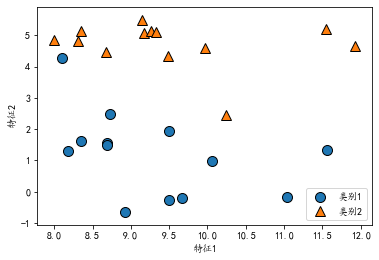

In [8]:
x, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
# loc指的是象限
plt.legend(["类别1", "类别2"], loc=4)
plt.xlabel("特征1")
plt.ylabel("特征2")
# 26个数据点 2个特征
print("x.shape: {}".format(x.shape))

Text(0, 0.5, '回归目标')

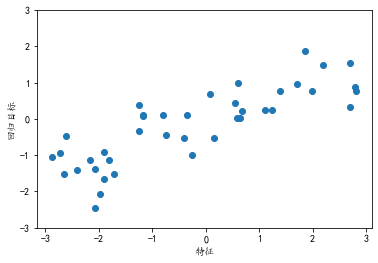

In [9]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("特征")
plt.ylabel("回归目标")

In [10]:
# 威斯康星州乳腺癌数据集
cancer = load_breast_cancer()
# 数据保存为Bunch对象，与字典很相似
print("cancer.keys(): {}".format(cancer.keys()))
# 该数据集有569个数据点，每个数据点有30个特征
print("Shape of cancer data: {}".format(cancer.data.shape))
# 该数据集的569个数据点中，212个被标记为恶性，357个被标记为良性
print("Sample counts per class: {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 为得到该数据集的每个特征的语义说明，可以查feature_names属性
print("Feature names: {}".format(cancer.feature_names))
# 了解更多信息
# print(cancer.DESCR)

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class: {'malignant': 212, 'benign': 357}
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
# 波士顿房价数据集
boston = load_boston()
# 该数据集有506个数据点和13个特征
print("Data Shape: {}".format(boston.data.shape))

# 扩展波士顿房价数据集 输入特征不仅包含这13个特征的测量结果，还包括这些特征之间的乘积(交互项)
x, y = mglearn.datasets.load_extended_boston()
# 最初的13个特征加上这13个特征两两组合(有放回)得到91个特征，现一共有104个特征
print("x.shape: {}".format(x.shape))

Data Shape: (506, 13)
x.shape: (506, 104)


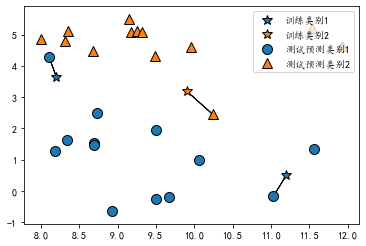

In [12]:
# KNN算法对forge数据集的二分类预测结果可视化
# K=1 只看最邻近的
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.legend(["训练类别1", "训练类别2", "测试预测类别1", "测试预测类别2"], loc=1)

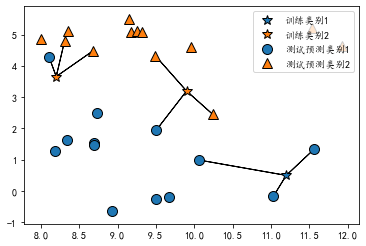

In [13]:
# K=3 三邻近
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.legend(["训练类别1", "训练类别2", "测试预测类别1", "测试预测类别2"], loc=1)

In [14]:
# 这里使用scikit-learn来训练KNN
x, y = mglearn.datasets.make_forge()
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 创建分类器 K=3
clf = KNeighborsClassifier(n_neighbors=3)

# 拟合训练
clf.fit(x_train, y_train)

print("测试集预测结果: {}".format(clf.predict(x_test)))

# 模型对其中86%的样本的预测都是正确的
print("预测准确率：{}".format(clf.score(x_test, y_test)))

测试集预测结果: [1 0 1 0 1 0 0]
预测准确率：0.8571428571428571


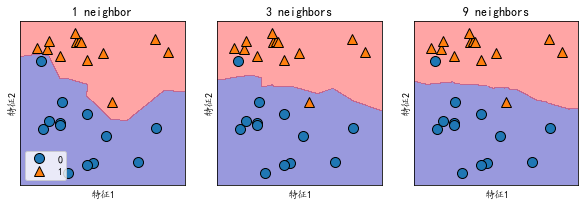

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 随着K的数值增大，决策边界也越来越平滑 => 使用更少的邻居对应更高的复杂度
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit()返回自身，所以我们可以将实例化和拟合放在同一行code中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title(("{} neighbors" if n_neighbors > 1 else "{} neighbor").format(n_neighbors))
    ax.set_xlabel("特征1")
    ax.set_ylabel("特征2")
    
axes[0].legend(loc=3)

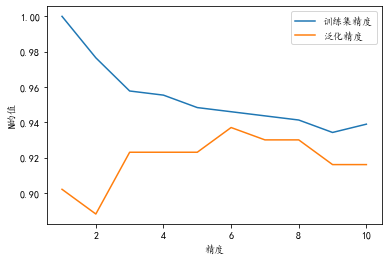

In [19]:
# 使用sickit-learn训练乳腺癌数据集的KNN模型
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy, test_accuracy = [], []

# N取[1, 10]
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(x_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="训练集精度")
plt.plot(neighbors_settings, test_accuracy, label="泛化精度")
plt.xlabel("精度")
plt.ylabel("N的值")
plt.legend()

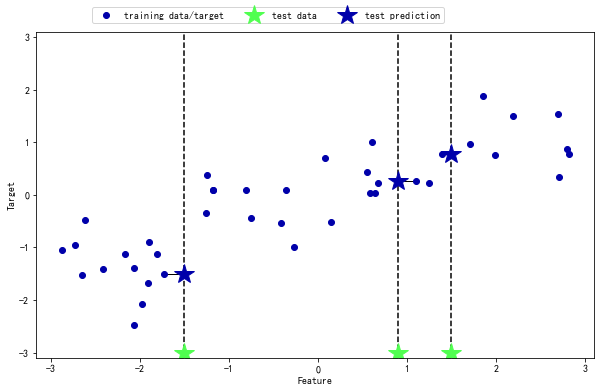

In [20]:
# K邻近回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

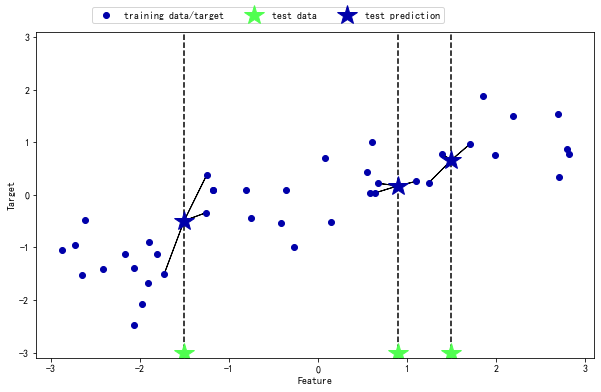

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

测试集预测结果：[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
测试集决定系数R^2：0.8344172446249604


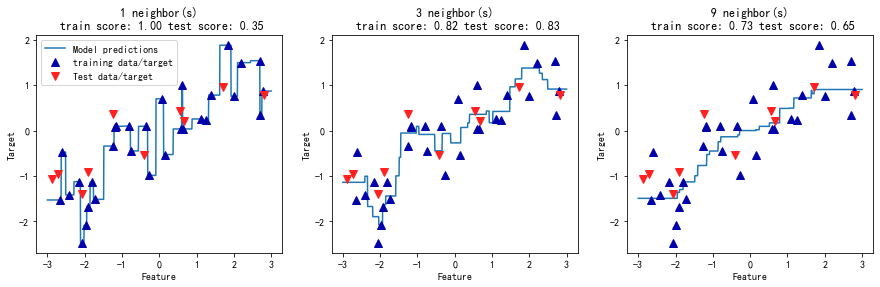

In [30]:
x, y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

print("测试集预测结果：{}".format(reg.predict(x_test)))
print("测试集决定系数R^2：{}".format(reg.score(x_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "training data/target", "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


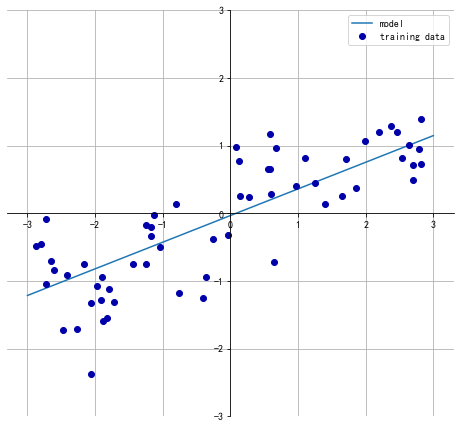

In [31]:
# 线性回归
mglearn.plots.plot_linear_regression_wave()